In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler

data = pd.read_csv("hotel_booking.csv")


data_deleted= data.drop(data.columns[[3,4,5,6,10,13,23,24,25,28,29,30,31,32,33,34,35]] , axis = 1)

for name in ["hotel","meal","market_segment","distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type"]:
    enc_arr = OneHotEncoder().fit_transform(data[[name]]).toarray()
    data_deleted["encoded_"+name] = enc_arr.tolist()
    #print(data_deleted)
    data_deleted.drop(name,axis=1, inplace=True)

for name in ["lead_time","stays_in_weekend_nights","stays_in_week_nights","adults","babies","is_repeated_guest","previous_cancellations","previous_bookings_not_canceled","booking_changes","adr"]:
    arr = data_deleted[name].to_numpy()
    normalized_arr = preprocessing.normalize([arr])
    normalized_arr_transpose = np.transpose(normalized_arr)
    data_deleted["normalized_"+name] = normalized_arr_transpose.tolist()
    data_deleted.drop(name, axis=1, inplace=True)

X=data_deleted.drop("is_canceled",axis=1)
y = data_deleted["is_canceled"]

rus = RandomUnderSampler(sampling_strategy='not minority')
X_res, y_res = rus.fit_resample(X,y)

final_data = X_res.join(y_res)

final_data.to_csv("final_data.csv", index = False,header=None)


In [ ]:
df = pd.DataFrame(data)
print(df)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
data = pd.read_csv("final_data.csv")

In [ ]:
from sklearn import svm
np.random.seed(7)
data= data.to_numpy()

In [ ]:
x_=data[:,0:-1]
y=data[:,-1]
a=True
b=True
c=3
d=[]
for i in x_:
  #print(i)
  x=[]
  for j in i:
    #print(j)
    #print(len(j))
    if j.__contains__(','):
      for e in range(len(j)):
        #print(len(j))
        if e%5==0:
          #print(e%5)
          #print(e)
          if e<len(j)-2:
            #print(len(j)-2)
            #print((j[e+1:e+1+c]))
            x.append(float(j[e+1:e+1+c]))
            #print(x)
    else:
      x.append(j[1:len(j)-1])
  #print(type(x[0]))
  d.append(x)
  #print(type(d[0][0]))

In [ ]:
x_data=np.array(d)
x_data=x_data.astype(np.float)

<ipython-input-6-4708b22b29f5>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_data=x_data.astype(np.float)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
x_data=pca.fit_transform(x_data)

In [ ]:
np.shape(x_data)

(88447, 10)

In [ ]:
x_arr=  np.empty(x_data.shape, dtype=x_data.dtype)
y_arr = np.empty(y.shape, dtype=y.dtype)
p = np.random.permutation(len(x_data))
for m, n in enumerate(p):
  x_arr[n] = x_data[m]
  y_arr[n] = y[m]
x_train=x_arr[0:(len(x_arr)//10)*7]
y_train=y_arr[0:(len(y_arr)//10)*7]
x_val=x_arr[(len(x_arr)//10)*7:(len(x_arr)//10)*8]
y_val=y_arr[(len(x_arr)//10)*7:(len(y_arr)//10)*8]
x_test=x_arr[(len(x_arr)//10)*8:len(x_arr)]
y_test=y_arr[(len(y_arr)//10)*8:len(y_arr)]
print(np.shape(x_test))
print(np.shape(y_test))

(17695, 10)
(17695,)


In [ ]:
df = pd.DataFrame(x_train)

print(df)

              0         1         2         3         4         5         6  \
0     -0.240290 -0.816598 -0.288868 -0.135657  0.266687 -0.333583 -0.106568   
1     -0.976307  0.424308  0.139980  0.899776  0.217632 -0.621115  0.456929   
2      0.087461 -0.458018 -0.039677  0.600160  0.211683 -0.468928 -0.006509   
3      0.327110  0.783906  0.622194  0.815521  0.853144 -0.272556  0.134787   
4      1.239486  0.079474 -0.406520 -0.373583 -0.402088 -0.483223 -0.038493   
...         ...       ...       ...       ...       ...       ...       ...   
61903 -1.099605 -0.116648  0.662410 -0.523159 -0.533804  0.290114 -0.733087   
61904  0.526831  0.652291 -0.730479  0.618118 -0.197372 -0.879446  0.045432   
61905  1.117063  1.208599 -0.127043 -0.747333  0.707691  0.833684  0.314464   
61906  1.191211 -0.880579  0.812392  0.405639 -0.142696 -0.014913  0.140657   
61907 -0.619182 -0.193694  0.136180 -0.006959  0.119340  0.144999 -0.965323   

              7         8         9  
0     -0.0123

In [ ]:
def acc(x_test,y_test,clf):
  a=0
  for i in range(len(x_test)):
    res=clf.predict(x_test[i].reshape(1,-1))
    #print(res)
    if res==y_test[i]:
      a+=1
  return a/len(x_test)

In [ ]:
y_train=y_train.astype(np.float)

<ipython-input-9-cc0a228148a9>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train=y_train.astype(np.float)


In [ ]:
x_train[0]

array([-1.19620262, -0.05014343,  0.73512438, -0.65840129, -0.56265671,
       -0.11700032,  0.49911453,  0.05658684, -0.03101561,  0.03437247])

In [ ]:
C_range = np.logspace(0, 8, 9)

In [ ]:
C_range

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
       1.e+08])

In [ ]:
a= []
for k in C_range:
  svm_= svm.SVC(C=k)
  svm_.fit(x_train,y_train)
  accuracy=acc(x_val,y_val,svm_)
  a.append(accuracy)

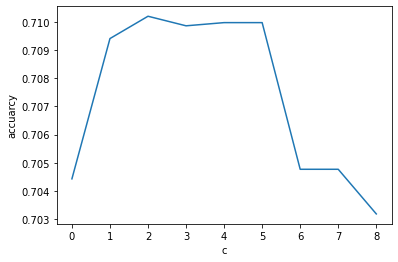

In [ ]:
import matplotlib.pyplot as plt
plt.plot(a)
plt.ylabel('accuarcy')
plt.xlabel('c')
plt.show()

In [ ]:
len(data)

In [ ]:
a

[0.7044323835368611,
 0.7094075079149706,
 0.7101990049751243,
 0.7098597919493442,
 0.7099728629579376,
 0.7099728629579376,
 0.7047715965626413,
 0.7047715965626413,
 0.7031886024423338]

In [ ]:
c=[*C_range][a.index(max(a))]
print(c)

100.0


In [ ]:
c

100.0

In [ ]:
def acc_new(x_test,y_test,clf):
  a=0
  fp=0
  fn=0
  tp=0
  tn=0
  for i in range(len(x_test)):
    res=clf.predict(x_test[i].reshape(1,-1))
    #print(res)
    if res==y_test[i]:
      a+=1
      if y_test[i]==1:
        tp+=1
      else:
        tn+=1
    else:
      if y_test[i]==1:
        fp+=1
      else:
        fn+=1
  return a/len(x_test),fp,fn,tp,tn

In [ ]:
d_range = range(1,10)
a= []
for k in d_range:
  svm_= svm.SVC(C=100,degree=k)
  svm_.fit(x_train,y_train)
  accuracy=acc(x_val,y_val,svm_)
  a.append(accuracy)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(a)
plt.ylabel('accuarcy')
plt.xlabel('degree')
plt.show()

In [ ]:
[*d_range][a.index(max(a))]

In [ ]:
gamma_range = np.logspace(-3, 2, 6)
a= []
for k in gamma_range:
  svm_= svm.SVC(C=100,gamma=k)
  svm_.fit(x_train,y_train)
  accuracy=acc(x_val,y_val,svm_)
  a.append(accuracy)


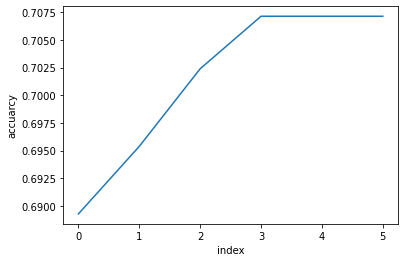

In [ ]:
import matplotlib.pyplot as plt
plt.plot(a)
plt.ylabel('accuarcy')
plt.xlabel('index')
plt.show()

In [ ]:
gamma

1.0

In [ ]:
gamma=[*gamma_range][a.index(max(a))]
svm_ = svm.SVC(C=100,gamma=gamma)
svm_.fit(x_train,y_train)
accuracy,f_p,f_n,t_p,t_n=acc_new(x_test,y_test,svm_)

In [ ]:
print("accuracy",accuracy)
print("false positive",f_p)
print("false negative",f_n)
print("true positive",t_p)
print("true negative",t_n)

accuracy 0.7168126589432043
false positive 1828
false negative 3183
true positive 7069
true negative 5615
